In [10]:
import numpy as np
import scipy.stats
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx


### Sampling from the potts model 

#### Parameters of the system

- set of nodes in q=2 state {0,1}
- set of edges (just for neighbors
- J=1 (interaction energy) (e.g. cost for being in the same state

the hamiltonian is given by 

$$ h(x) = -J \sum_E \delta(x_i,x_j) $$ 

Where delta is the kronecker delta (1 if same, 0 if not). If more states are the same, the hamiltonian will be lower. 


Then the probability of any given state is the energy of one state normalized by the sums of energys of all other states. (This is the boltzman distribution?). 

$$ P(x) = \frac{e^{-Bh(x)}}{\sum e^{-Bh(x)} } $$

Higher hamiltonian means lower probability. So in general this set-up encourages homgeneity. B is usually a small positive number (temperature of the system x boltzman constant). 



#### Sampling from the system

1. start in intitial state
2. calculate energy of the state 



In [11]:
# 4 node case

J=1
B = 1# how much does B need to be for different states to have meaningfully differenet energies. 
num_nodes = 20
num_states = 2
edges = np.zeros((num_nodes,num_nodes))
edges[0,1]=1
edges[0,2]=1
edges[1,3]=1
edges[2,3]=1


nodes_current_state = np.zeros(num_nodes)

edges


array([[ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [12]:
def calc_energy_state(nodes_current_state,edges,J):
    
    #loop through all edges. 
    num_nodes = len(nodes_current_state)
    
    # hamiltonian will be matrix of edges with kron_delta=1
    hamil = np.zeros((num_nodes,num_nodes))
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            is_edge = edges[i,j] # determine if edge
            if is_edge:
                if nodes_current_state[i]==nodes_current_state[j]:
                    kron_delta = 1
                else:
                    kron_delta = 0
                
                hamil[i,j] = kron_delta
            
    hamil_out = -1.0*J*np.sum(hamil)
    return(hamil_out)
            

    
nodes_current_state = [0,0,0,0]
hamil = calc_energy_state(nodes_current_state,edges,J)
print(hamil)

nodes_current_state = [0,1,1,1]
hamil = calc_energy_state(nodes_current_state,edges,J)
print(hamil)

nodes_current_state = [0,1,0,1]
hamil = calc_energy_state(nodes_current_state,edges,J)
print(hamil)

nodes_current_state = [0,1,1,0]
hamil = calc_energy_state(nodes_current_state,edges,J)
print(hamil)

-4.0
-2.0
-2.0
-0.0



### Metropolis-Hasting Algorithm

https://www.rose-hulman.edu/mathjournal/archives/2007/vol8-n1/paper13/v8n1-13pd.pdf


In [13]:
num_nodes

20

In [14]:
np.random.multinomial(1,np.ones(num_states)/num_states)

array([1, 0])

In [15]:
print(np.random.multinomial(1,np.ones(num_nodes)/num_nodes))
print(np.where(np.random.multinomial(1,np.ones(num_nodes)/num_nodes))[0])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0]


In [16]:
print(nodes_current_state)

calc_energy_state(nodes_current_state,edges,J)

[0, 1, 1, 0]


-0.0

20


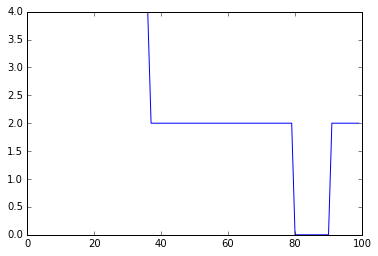

In [17]:

### Sample (Metropolis-Hasting)

# initial state
print(num_nodes)
nodes_current_state = np.zeros(num_nodes)
num_samples = 100
Temp = 1

energy_current_state = np.array([])

for m in range(num_samples):
    
    # calc energy of current state
    EA = -1.0*B*calc_energy_state(nodes_current_state,edges,J)
    energy_current_state = np.append(energy_current_state,EA)
    
    # perturb state
    random_node = np.where(np.random.multinomial(1,np.ones(num_nodes)/num_nodes))[0]
    nodes_proposed_state = nodes_current_state.copy()
    nodes_proposed_state[random_node] =np.where(np.random.multinomial(1,np.ones(num_states)/num_states))[0]
    
    # calc energy of new state
    EB =  -1.0*B*calc_energy_state(nodes_proposed_state,edges,J)
    
    # accept or reject new state
    if EB<EA:
        nodes_current_state = nodes_proposed_state.copy() # if proposed state has lower energy than accept automatically
    else:
        p_accept = np.exp(-1.0*(EB-EA)/Temp)
        accept = np.random.binomial(1,p_accept)
        if accept:
            nodes_current_state = nodes_proposed_state.copy()
        else:
            nodes_current_state = nodes_current_state.copy()
    

plt.plot(energy_current_state)    
    

In [18]:
nodes_current_state

array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])


plt.plot(np.exp(-1.0*(np.arange(10))/1))
plt.plot(np.exp(-1.0*(np.arange(10))/10))



### DATA




In [19]:
### generate time series .. 

### the mean time course for each region is auto-regressive.. And then white noise is added. 

### Modeling as von-mises distribution. What does that mean? It means the mean time course is a unit vector (point) on the unit sphere. 
### the other time series in the region are also points on this unit sphere. 

### The probabiltiy of a time series x is dot product 1normalization= /e^(u^T x * k.)


scipy.special.jv(v, z) # bessel fnction 


NameError: name 'v' is not defined


### von-mises fisher, and normalization constant. 


 generate time series .. 

 the mean time course for each region is auto-regressive.. And then white noise is added. 

Modeling as von-mises distribution. What does that mean? It means the mean time course is a unit vector (point) on the unit sphere. 
### the other time series in the region are also points on this unit sphere. 

The probabiltiy of a time series x is dot product with mean. 


$$ p(x|u,k) = \frac{1}{C(k)} e^(u^T x * k.) $$



$$ Cp(k) = \frac{k^{p/2-1}}{(2\pi)^{p/2} bessel_(p/2-1,k) }$$

In [ ]:


def prob_x_given_u_k(x,u,k,p):
    
    # u is mean time series
    # k concentration parameter
    # p is length of time series
    
    return(partition(k,p)*np.exp(np.dot(u,x)*k))

def partition(k,p):
    return((k**(p/2.0-1))/((2*np.pi)**(p/2)*scipy.special.jv(p/2-1,k)))



#### generate two time series. 

def generate_mean_time_series(n,rho,e):
    u = np.zeros(n)
    u[0]=np.random.normal(1)
    for i in np.array(range(n-1))+1:
        u[i] = u[i-1]*rho + np.random.normal(0,e)
        
    u = u-u.mean() # 0-mean
    u = u/np.linalg.norm(u,2) # unit-norm
    
    return(u)




def generate_x_from_mean(u,n,p,SNR):
    x = np.zeros((n,p))
    for i in range(p):
        x[:,i] = u+np.random.normal(0,SNR,n)
        x[:,i] = x[:,i]-x[:,i].mean() # 0-mean
        x[:,i] = x[:,i]/np.linalg.norm(x[:,i],2) # unit-norm
    
    return(x)

def generate_x_from_mean_single(u,t,SNR):
    x = np.zeros(t)
    x = u+np.random.normal(0,SNR,t)
    x = x-x.mean() # 0-mean
    x = x/np.linalg.norm(x,2) # unit-norm
    
    return(x)

    

In [ ]:
n = 100 # number of time points 
p = 4 # number of x's

for SNR in [0.01,0.1,0.2,4]:
    plt.figure()
    u = generate_mean_time_series(n,.8,.1)
    plt.plot(u,color='red',linewidth=5)

    x = generate_x_from_mean(u,n,p,SNR)
    plt.plot(x)
    plt.title('prob of time series: '+str((prob_x_given_u_k(x[:,0],u,1,p))))

### Example 

- generate time series. 64 voxels? 
- 2 clusters
- plot clusters on circle
- build a graph (grid)
- write down complete liklihood. (part from prob(z|z neihbors), and prob(x given z)
- then do EM to estimate u,k (not knowing z)
- but to do E-step, need to do monte-carlo. 





In [ ]:
from scipy.optimize import minimize

z_ms = [np.array([0,0,0,1]),np.array([0,1,0,1]),np.array([1,1,0,0]),np.array([1,1,0,0]),np.array([1,1,1,0])]


def test(x):
    log_lik = np.array([])
    for z in z_ms:
        #print(z)
        log_lik = np.append(log_lik,x*z.sum())
        
    return(np.sum(-1*log_lik))
    
    
    
x0 = 1 # initial B
res = minimize(test, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})

test(6)

# Generate Data

### Create Graph of Hidden States (Labels)

In [ ]:
import networkx as nx
nn=10
num_nodes = nn*nn
G=nx.grid_2d_graph(nn,nn)  #4x4 grid
G.graph['B'] = .5




In [ ]:
### Calculate a bunch of random Graphs
# add random state

num_random = 16
graph_store = np.zeros((nn,nn,num_random))

fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(12,12))
axs = np.array(axs).reshape(-1)

for i in range(num_random):
    for n in G.node:
        state=np.random.binomial(1,.5)
        G.node[n]['state']=state
        graph_store[n[0],n[1],i] = state
    
    axs[i].imshow(graph_store[:,:,i],interpolation='None')
graph_store.shape


In [ ]:

# add organized states
#for n in G.node:
#    if np.sum(np.array(n))>5:
#        G.node[n]['state']=1
#    else:
#        G.node[n]['state']=0
        


### Calculate Energy Function of Graph

$$ E = -B*\sum_{i,j \in N} \delta(xi,xj) $$ 

Where delta is kronecker delta is 1 if states are equal. Therefore, a system that has more equal states has lower energy. 


In [ ]:
def calc_relative_energy_state(G):
    # takes in current state of graph, sums the number of edges that have the same state 
    
    kron_delta=0
    for edge in G.edges():
        if G.node[edge[0]]['state']==G.node[edge[1]]['state']:
            kron_delta+=1

    energy = -1.0*G.graph['B']*kron_delta 
    return(energy)




### Actually need to create a graph by sampling from this distribution with a certain B


In [ ]:
im = np.empty((10,10))
for node in G.node:
    im[node]=G.node[node]['state']
    
plt.imshow(im.T,interpolation='None',origin='lower')

In [ ]:
np.mod(201,10)

### Sampling from Potts Model

Metropolis-Algorithm. 

1. Start graph initial state A. 
2. Calculate the energy of $ E_A $
3. Change a node to a new state, uniformly drawn from possibilities. State of graph is now B. 
4. Calculate energy of new state $ E_B $
5. If new state has lower energy, switch to new state. 
6. If new state has higher energy, switch to it with probability $ e^{-(E_B-E_A)}$. In my case, the higher energy might have would be increased by exactly B. So if B is 2, p=.13, if B is 0.1, p=.9. 

In [ ]:
def sample_from_potts(B,num_states,steps,plot=True):

    num_states = num_states

    ### Initialize Empty Graph (Random States)
    G=nx.grid_2d_graph(nn,nn)  #4x4 grid    
    for n in G.node:
        state=np.random.randint(num_states)
        G.node[n]['state']=state

    G.graph['B'] = B
    G.graph['num_states']=num_states
    G.graph['nn']=nn

    # MCMC Step
    steps = steps

    # store stuff
    energy = np.array([])
    prob = np.array([])
    deltas = np.array([])
    graph_store = np.zeros((nn,nn,steps))


    for step in range(steps):

        for node in G.node:
            # then calculate current energy 
            Ea = calc_relative_energy_state(G)
            energy = np.append(energy,Ea)

            # store previous node
            G.node[node]['prev_state'] = G.node[node]['state']

            # flip state 
            G.node[node]['state'] = np.random.randint(num_states)

            # recalculate energy.. 
            Eb = calc_relative_energy_state(G)

            delta = Eb-Ea
            deltas = np.append(deltas,delta)
            if delta>0: # if new state has higher energy 
                p_accept = np.exp(-1.0*(Eb-Ea)) # switch 
                prob = np.append(prob,p_accept)
                accept = np.random.binomial(1,p_accept)
                if accept==0:
                    G.node[node]['state'] = G.node[node]['prev_state']
            else: # if new state has lower energy automatically switch
                #G.node[node]['state'] = G.node[node]['prev_state']
                G.node[node]['state'] = G.node[node]['state'] # 

            graph_store[node[0],node[1],step] = G.node[node]['state']


    if plot:
      
        # accept if accept 
        plt.figure(figsize=(12,3))
        plt.subplot(131)
        plt.plot(energy)
        plt.subplot(132)
        plt.plot(prob)
        plt.subplot(133)
        plt.imshow(graph_store[:,:,0],interpolation='None',origin='lower')

        fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(12,12))
        axs = np.array(axs).reshape(-1)
        for a,ax in enumerate(axs):
            numm = a*10
            ax.imshow(graph_store[:,:,-1-numm],interpolation='None',origin='lower')
    
    return(G)

In [ ]:
sample_from_potts(1.5,5,200)


In [ ]:
sample_from_potts(1,5,200)

In [ ]:
G=sample_from_potts(1.2,5,300)

In [ ]:
sample_from_potts(.1,5,200)

In [ ]:
def to_str(state):
    if state==0:
        return('b')
    elif state ==1:
        return('r')
    elif state ==2:
        return('g')
    elif state ==3:
        return('y')
    elif state ==4:
        return('w')

### Generate Graph (Random Sample from Potts)

In [ ]:
G=sample_from_potts(1.2,5,100,plot=False)
for n in G.node:
    G.node[n]['true_state']=G.node[n]['state']

In [ ]:
def plot_graph(G,true_also=True):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('estimate')
    pos = dict( (n, n) for n in G.nodes() )
    labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
    #colors = dict( ((i, j), to_str(G.node[i,j]['state'])) for i, j in G.nodes() )
    colors =  [to_str(G.node[i,j]['state']) for i, j in G.nodes() ]
    nx.draw_networkx(G, pos=pos, labels=labels,node_color=colors)
    plt.axis('off')
    
    if true_also:
        plt.subplot(122)
        plt.title('true')
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
        #colors = dict( ((i, j), to_str(G.node[i,j]['state'])) for i, j in G.nodes() )
        colors =  [to_str(G.node[i,j]['true_state']) for i, j in G.nodes() ]
        nx.draw_networkx(G, pos=pos, labels=labels,node_color=colors)
        plt.axis('off')
    
    
plot_graph(G)

### Generate Data given Hidden States

In [ ]:
G.graph

In [9]:
### Generate Data ### 

def add_data_to_graph(G):
    t = 50 # number of time points 
    SNR = 0.1
    e = .3
    corr=0.5

    X = np.zeros((t,G.graph['nn']**2))
    u = np.empty((t,G.graph['num_states']))
    for ui in range(G.graph['num_states']):
        u[:,ui] =generate_mean_time_series(t,corr,e)

    plt.subplot(121)
    plt.plot(u)
    states = np.array([])
    for ni,n in enumerate(G.node):
        #print(n)

        x = generate_x_from_mean_single(u[:,G.node[n]['state']],t,SNR)
        states = np.append(states,G.node[n]['state'])
        X[:,ni] = x
        G.node[n]['x'] = x
        plt.subplot(122)
        plt.plot(x)

    G.graph['u'] = u
    G.graph['X'] = X

    # Generate Random Estimates
    u_est = np.empty((t,G.graph['num_states']))
    for ui in range(G.graph['num_states']):
        u_est[:,ui] =generate_mean_time_series(t,corr,e)

    G.graph['u_est'] = u_est
    G.graph['states'] = states
    return(G)
G = add_data_to_graph(G)

NameError: name 'G' is not defined

<matplotlib.colorbar.Colorbar instance at 0x1084a6ef0>

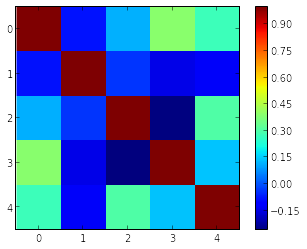

In [66]:

plt.imshow(np.corrcoef(G.graph['u'].T),interpolation='None')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1082ef9e0>

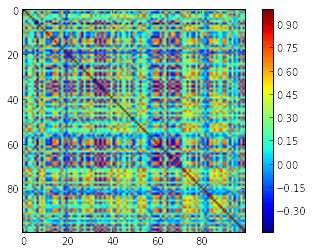

In [67]:
plt.imshow(np.corrcoef(G.graph['X'].T))
plt.colorbar()

In [70]:
G.graph['states']

array([ 0.,  2.,  0.,  0.,  4.,  3.,  2.,  0.,  3.,  0.,  2.,  2.,  2.,
        3.,  3.,  3.,  2.,  0.,  3.,  1.,  3.,  2.,  3.,  3.,  4.,  2.,
        3.,  4.,  3.,  3.,  0.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  3.,
        0.,  2.,  3.,  0.,  3.,  4.,  0.,  3.,  4.,  3.,  2.,  4.,  0.,
        3.,  0.,  0.,  4.,  2.,  1.,  3.,  3.,  3.,  2.,  3.,  0.,  2.,
        3.,  2.,  2.,  3.,  3.,  2.,  0.,  0.,  3.,  0.,  3.,  3.,  0.,
        3.,  4.,  2.,  1.,  2.,  3.,  3.,  0.,  3.,  0.,  0.,  3.,  3.,
        0.,  2.,  0.,  1.,  0.,  2.,  3.,  2.,  3.])

<matplotlib.colorbar.Colorbar instance at 0x108327b48>

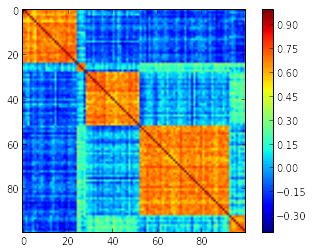

In [72]:
plt.imshow(np.corrcoef(G.graph['X'][:, np.argsort(G.graph['states'])].T))
plt.colorbar()

# Recover Parameters and Latent States

## E-M Algorithm 




### E-step (MCMC) Sample from Posterior 




In [73]:
print(node)
print(G.neighbors(node))


(5, 2)
[(4, 2), (5, 3), (6, 2), (5, 1)]


In [74]:
for edge in G.edges(node):
    print(edge)

((5, 2), (4, 2))
((5, 2), (5, 3))
((5, 2), (6, 2))
((5, 2), (5, 1))


In [75]:
def calc_relative_energy_state_single_node(G,node):
    # takes in current state of graph, sums the number of edges that have the same state 
    
    kron_delta=0
    for edge in G.edges(node):
        if G.node[edge[0]]['state']==G.node[edge[1]]['state']:
            kron_delta+=1

    energy = -1.0*G.graph['B']*kron_delta 
    return(energy)

calc_relative_energy_state_single_node(G,node)

-4.8

In [78]:
k = 1
u = G.graph['u_est'][:,G.node[node]['state']]
x = G.node[node]['x']
            
# then calculate current energy 
Ea = calc_relative_energy_state_single_node(G,node)  - np.dot(u,x) - np.log(partition(k,p))
print('A')
print(calc_relative_energy_state_single_node(G,node))
print(np.dot(u,x))
print(Ea)

            # flip state 
G.node[node]['state'] = np.random.randint(num_states)

            # get new mean estimate
u = G.graph['u_est'][:,G.node[node]['state']]
            
            # recalculate energy.. 
Eb = calc_relative_energy_state_single_node(G,node) - np.dot(u,x) - np.log(partition(k,p))

print('B')
print(calc_relative_energy_state_single_node(G,node))
print(np.dot(u,x))
print(Eb)

print('delta')
print(Eb-Ea)

A
-4.8
0.0704370870688
-2.01554854533
B
-0.0
0.0745716273576
2.78031691439
delta
4.79586545971


### 

MCMC for minimizing the posterior energy. 
$$ p(zi|x) = \beta \sum delta(zi,zj) - u^T x $$

The first term acts as a regularizer. If the hidden state is the same as neighbor, this is a better energy state. Likewise, its a better state when the dot product is larger. 


In [79]:

for i in range(5):
    print(np.dot(G.graph['u'][:,i],x))

-0.148594545057
0.279309824785
-0.0979818714665
0.840076008183
0.101023202311


In [80]:
def MCMC(G,steps,use_real=False):
    num_states = G.graph['num_states']

    k=1
    p = G.graph['nn']**2
    
    # MCMC Step
    steps = steps

    # store stuff
    energy = np.array([])
    prob = np.array([])
    deltas = np.array([])
    graph_store = np.zeros((nn,nn,steps))
    perf = np.array([])

    for step in range(steps):

        for node in G.node:
            
            
            u = G.graph['u_est'][:,G.node[node]['state']]
            if use_real:
                u = G.graph['u'][:,G.node[node]['state']]
            x = G.node[node]['x']
            
            # then calculate current energy 
            Ea = calc_relative_energy_state_single_node(G,node)  - np.dot(u,x) - np.log(partition(k,p))
            energy = np.append(energy,Ea)

            # store previous node
            G.node[node]['prev_state'] = G.node[node]['state']

            # flip state 
            G.node[node]['state'] = np.random.randint(num_states)

            # get new mean estimate
            u = G.graph['u_est'][:,G.node[node]['state']]
            if use_real:
                u = G.graph['u'][:,G.node[node]['state']]
            
            # recalculate energy.. 
            Eb = calc_relative_energy_state_single_node(G,node)  - np.dot(u,x) - np.log(partition(k,p))

            delta = Eb-Ea
            deltas = np.append(deltas,delta)
            if delta>0: 
                # if new state has higher energy 
                p_accept = np.exp(-1.0*(Eb-Ea)) # switch 
                prob = np.append(prob,p_accept)
                accept = np.random.binomial(1,p_accept)
                if accept==0:
                    G.node[node]['state'] = G.node[node]['prev_state']
            else: 
                # if new state has lower energy automatically switch
                G.node[node]['state'] = G.node[node]['state'] # 

            graph_store[node[0],node[1],step] = G.node[node]['state']
        perf=np.append(perf,assess_perf(G))
        
    out = {}
    out['deltas']=deltas
    out['graph_store']=graph_store
    out['perf']=perf
    out['energy']=energy
    return(G,out)

In [84]:
def assess_perf(G):

    # for true states, find all matching nodes. 
    for node1 in G.nodes():
        state1 = G.node[node1]['true_state']
        G.node[node1]['matching_nodes_true'] = []
        for node2 in G.nodes():
            state2 = G.node[node2]['true_state']
            if state1==state2:
                G.node[node1]['matching_nodes_true'].append(node2)

    for node1 in G.nodes():
        state1 = G.node[node1]['state']
        G.node[node1]['matching_nodes'] = []
        for node2 in G.nodes():
            state2 = G.node[node2]['state']
            if state1==state2:
                G.node[node1]['matching_nodes'].append(node2)            

    # another graph 
    matches = np.empty(G.graph['nn']**2)
    for ni,node1 in enumerate(G.nodes()):
        matches[ni]=len(set(G.node[node1]['matching_nodes']).intersection(set(G.node[node1]['matching_nodes_true'])))


    return(matches.sum())

In [85]:
G,deltas = MCMC(G,200)

TypeError: float() argument must be a string or a number

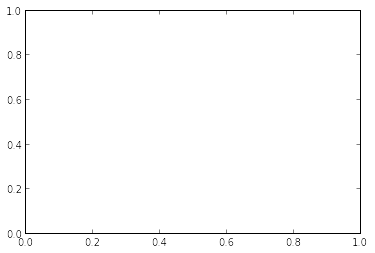

In [86]:
plt.plot(deltas)

In [ ]:
### M step



In [ ]:
G.graph['u_est'].shape

In [ ]:
G.graph['B']

### Do Everything


In [204]:
# generate random graph 
G=sample_from_potts(1.2,5,100,plot=False)
for n in G.node:
    G.node[n]['true_state']=G.node[n]['state']

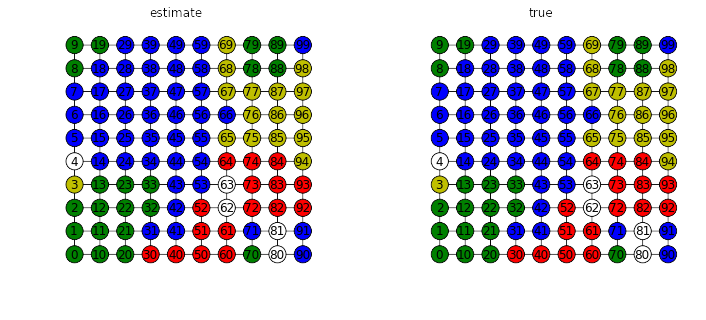

In [212]:
plot_graph(G)

In [207]:
G.graph

{'B': 1.2, 'name': 'grid_2d_graph', 'nn': 10, 'num_states': 5}

In [206]:
assess_perf(G)

2742.0

In [211]:
#G,out = ICM(G,50,use_real=True,plot=False)
#plot_graph(G)

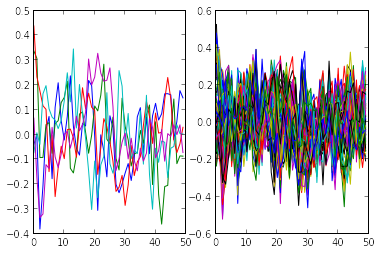

In [213]:
# add data 
G = add_data_to_graph(G)

In [295]:
# randomize starting position 
for n in G.node:
    state=np.random.randint(G.graph['num_states'])
    G.node[n]['state']=state

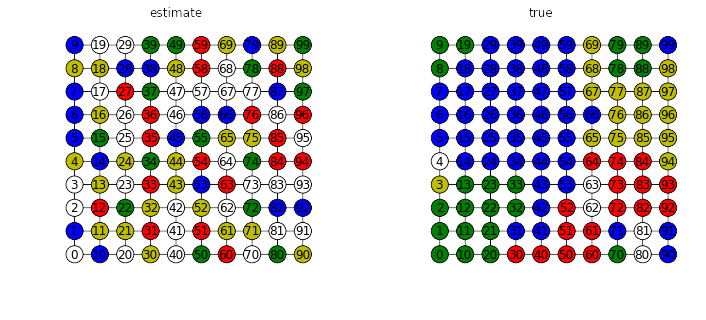

In [296]:
plot_graph(G)

In [216]:
assess_perf(G)

636.0

In [217]:
X = G.graph['X']
X.shape
X
from sklearn.cluster import KMeans 

kmeans = KMeans(5)
results = kmeans.fit(X.T)
labels = results.fit_predict(X.T)
labels

array([3, 0, 1, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0, 4, 2, 2, 1, 3, 1, 3, 3, 0, 2,
       1, 1, 2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 1, 0, 3, 1, 1, 1, 2, 2, 1, 1, 3,
       1, 3, 3, 1, 3, 2, 2, 1, 3, 1, 0, 4, 4, 3, 1, 1, 2, 2, 0, 1, 0, 0, 1,
       2, 0, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 4, 1, 4, 2,
       2, 1, 2, 1, 2, 1, 0, 3], dtype=int32)

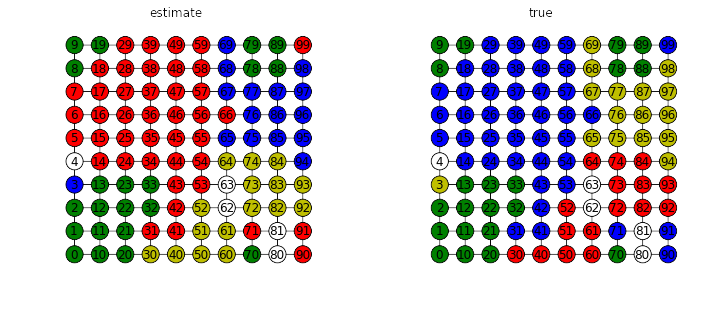

In [218]:
### Do K-means here instead 

# randomize starting position 
for ni,n in enumerate(G.node):
    G.node[n]['state']=labels[ni]
plot_graph(G)

In [219]:
assess_perf(G)

2742.0

In [272]:
def ICM(G,steps,use_real=False,plot=False):
    num_states = G.graph['num_states']

    k=1
    p = G.graph['nn']**2
    
    # MCMC Step
    steps = steps

    # store stuff
    energy = np.array([])
    prob = np.array([])
    deltas = np.array([])
    graph_store = np.zeros((nn,nn,steps))
    perf = np.array([])

    for step in range(steps):

        for node in G.node:
            
            # store the original state
            G.node[node]['state_k-1'] = G.node[node]['state']

            ### calculate energy for each new state and take minimum 
            temp_energy = np.empty(G.graph['num_states'])
            
            for possible_state in range(G.graph['num_states']):
                G.node[node]['state'] = possible_state
                if use_real:
                    u = G.graph['u'][:,G.node[node]['state']]
                else:
                    u = G.graph['u_est'][:,G.node[node]['state']]
                x = G.node[node]['x']
                temp_energy[possible_state] = 0.5*calc_relative_energy_state_single_node(G,node)  - np.dot(u,x) - np.log(partition(k,p))
        
            G.node[node]['state_k+1'] = np.argmin(temp_energy) # store what it will switch to 
            G.node[node]['state'] = G.node[node]['state_k-1'] # go back to original state (e.g. last MCMC sample) before doing next node
            
            if plot:
                plot_graph(G)
                
        
        # now actually switch the states
        for node in G.node:
            G.node[node]['state'] = G.node[node]['state_k+1']
            

        graph_store[node[0],node[1],step] = G.node[node]['state']
        perf=np.append(perf,assess_perf(G))
        
    out = {}
    out['deltas']=deltas
    out['graph_store']=graph_store

    return(G,out)

1320.0


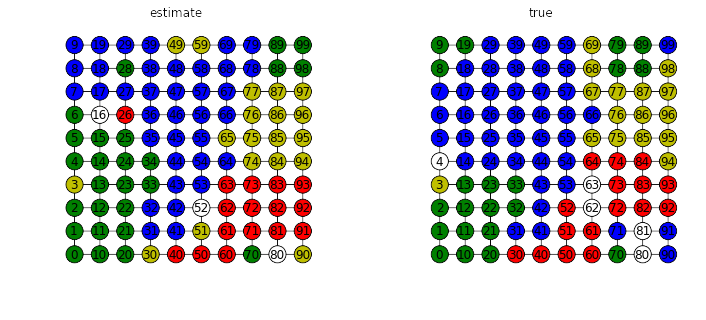

In [275]:
### Can I recover the states without estimating them? 
G,out = MCMC(G,300,use_real=True)
plot_graph(G)
print(assess_perf(G))

2378.0


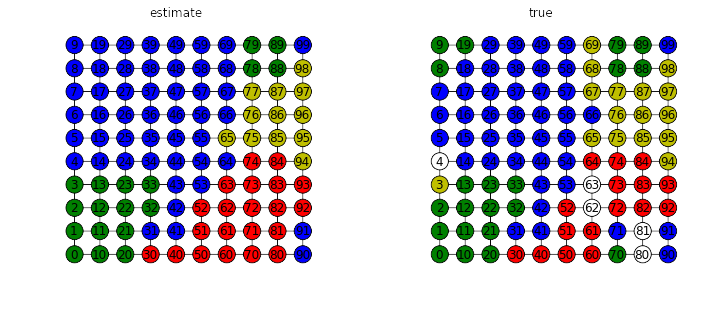

In [276]:
G,out = ICM(G,50,use_real=True,plot=False)
plot_graph(G)
print(assess_perf(G))

In [183]:
np.argmin(temp_energy)

1

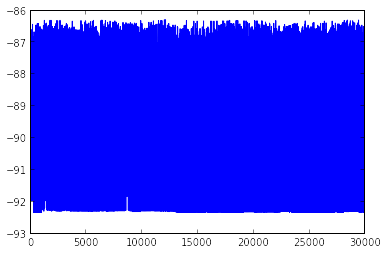

In [148]:
plt.plot(out['energy'])

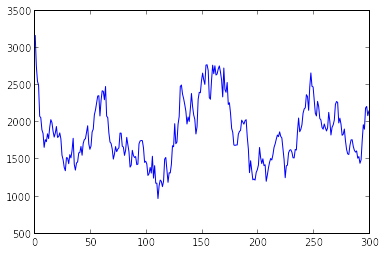

In [149]:
plt.plot(out['perf'])

In [1181]:
#modes = scipy.stats.mstats.mode(out['graph_store'],axis=2)[0][:,:,0]

In [1298]:
#plt.imshow(modes,interpolation='None')

In [150]:
deltas = out['deltas']

(array([  24,  106,  293,  689, 7490, 2508, 3658, 4924, 5708, 4600]),
 array([-5.82926005, -4.64545713, -3.46165422, -2.2778513 , -1.09404839,
         0.08975453,  1.27355745,  2.45736036,  3.64116328,  4.8249662 ,
         6.00876911]),
 <a list of 10 Patch objects>)

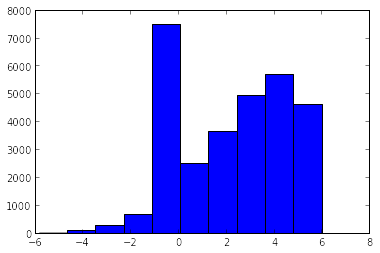

In [151]:
plt.hist(deltas)

(array([15779,  2356,   947,   540,   528,   496,   315,   210,   196,   178]),
 array([ 0.00245711,  0.10213436,  0.2018116 ,  0.30148884,  0.40116609,
         0.50084333,  0.60052058,  0.70019782,  0.79987507,  0.89955231,
         0.99922956]),
 <a list of 10 Patch objects>)

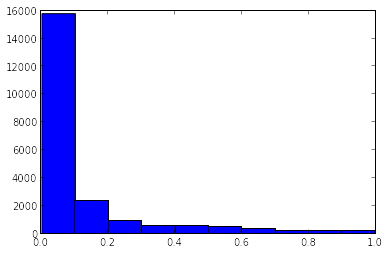

In [152]:
plt.hist(np.exp(-1.0*deltas[deltas>0]))

In [327]:
# generate random graph 
G=sample_from_potts(1,5,100,plot=False)
for n in G.node:
    G.node[n]['true_state']=G.node[n]['state']

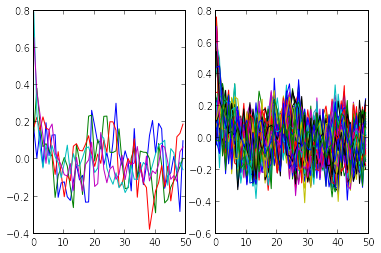

In [328]:
G = add_data_to_graph(G)

In [329]:
# randomize starting position 
for n in G.node:
    state=np.random.randint(G.graph['num_states'])
    G.node[n]['state']=state

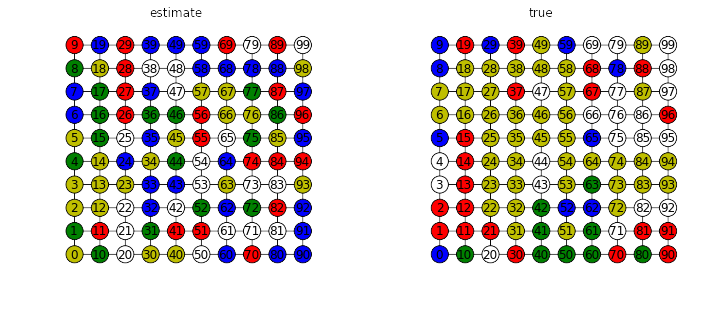

In [330]:
plot_graph(G)

### Calculate K for Known States.. 

g(ˆκl) = Ap(ˆκl)−(ˆκl−μκ)/(Nlσ2
κ)−Rl = 0

In [358]:
def minimize_for_d(k): ##args):
    #p = args['p']
    #x = args['x']
    #u = args['u']
    return(k*np.dot(u,x) + np.log(partition(k,p)))



In [371]:
def partition(k,p):
    return((k**(p/2.0-1.0))/(((2.0*np.pi)**(p/2.0))*(scipy.special.jv(p/2.0-1.0,k))))


/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


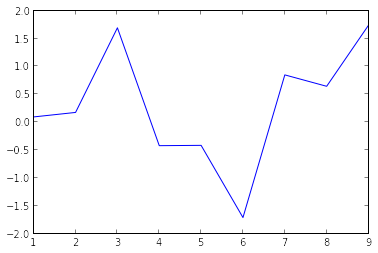

In [376]:
plt.plot(partition(np.arange(0,10),3))

In [381]:
def vMF(k):
    return(partition(k,p)*np.exp(k*np.dot(u,x)))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


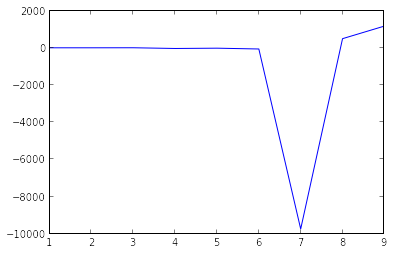

In [382]:
plt.plot(vMF(np.arange(0,10)))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


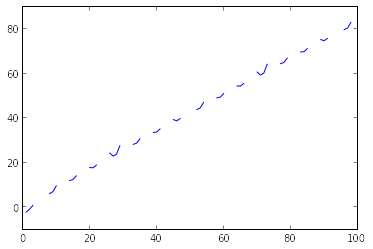

In [367]:
plt.plot(minimize_for_d(np.arange(0,100)))

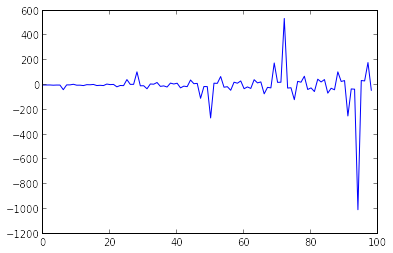

In [369]:
plt.plot(partition(np.arange(1,100),p))

In [338]:
p

4

In [343]:
args = {}
args['p'] = p
args['x'] = x
args['u'] = u
scipy.optimize.minimize(minimize_for_d,1)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/optimize/optimize.py:153: RuntimeWarning: invalid value encountered in absolute
  return numpy.amax(abs(x))


  status: 2
 success: False
    njev: 16
    nfev: 48
     fun: array([ nan])
       x: array([ 1080.27456665])
 message: 'Desired error not necessarily achieved due to precision loss.'
    hess: array([[1]])
     jac: array([ nan])

In [331]:
print(assess_perf(G))
### EM 
num_samples = 50
for steps in range(10):
    
    # e-step
    G,out = MCMC(G,200,use_real=False)
    posterior_samples = out['graph_store'][:,:,-1*num_samples:-1] # take 100 samples from posterior, after burn-in period

    
    # m-step
    u_est_new =G.graph['u_est']
    for node in G.node:
        for sample in range(num_samples-1):
            state = posterior_samples[node[0],node[1],sample]
            u_est_new[:,state] += G.node[node]['x'] # add the x data to that time vector
    
    for state_type in range(G.graph['num_states']):
        #u_est_new[:,state_type] = u_est_new[:,state_type]-u_est_new[:,state_type].mean()
        u_est_new[:,state_type] = u_est_new[:,state_type]/np.linalg.norm(u_est_new[:,state_type],2)
    
    G.graph['u_est'] = u_est_new
    
    # do ICM , but dont save graph... ? to put back in MCMC? 
    # need to estimate B too. 
    Gtest,out = ICM(G,5,use_real=False,plot=False)
    
    print(assess_perf(Gtest))

    #cor = np.corrcoef(u_est_new[:,0],G.graph['u'][:,0])[0,1]
    #print(cor)

576.0
1256.0
988.0
768.0
798.0
1374.0
892.0
668.0
726.0
754.0
1120.0


/Library/Python/2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1138.0


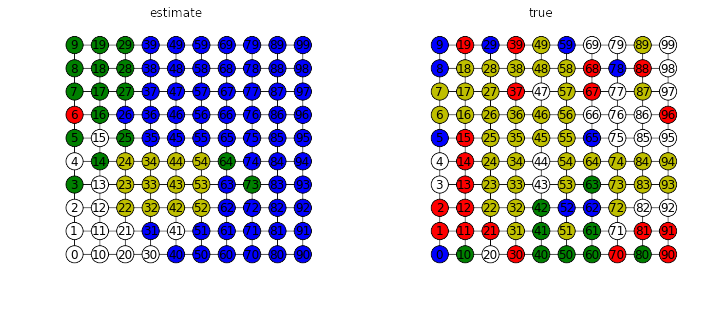

In [332]:
G,out = ICM(G,50,use_real=False,plot=False)
plot_graph(G)
print(assess_perf(G))

In [333]:
for i in range(5):
    corrs = np.empty(5)
    for ii in range(5): 
        corrs[ii] = np.corrcoef(G.graph['u_est'][:,i],G.graph['u'][:,ii])[0,1]
        
    print(np.argmax(corrs))
    print((corrs))
    print('skip')

4
[ 0.3264956   0.61649598  0.50090902  0.85290462  0.88252773]
skip
3
[ 0.29715602  0.58205033  0.44510278  0.90714289  0.84769069]
skip
3
[ 0.39840266  0.64115594  0.43494041  0.86129438  0.83149715]
skip
3
[ 0.33774736  0.64624898  0.50078625  0.8595835   0.84482511]
skip
4
[ 0.36330379  0.69849091  0.54389164  0.79483096  0.84783851]
skip
